<a href="https://colab.research.google.com/github/nirmaldangal/class2/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U scikit-learn

# New Section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
#dataset = pd.read_csv('/content/Salary Data.csv')
dataset = pd.read_csv('/content/Salary Data.csv',usecols = ['Age','Salary'])
dataset = dataset.dropna()     #drops rows having empty value or NAN value
dataset

,Age,Salary
0,32.0,90000.0
1,28.0,65000.0
2,45.0,150000.0
3,36.0,60000.0
4,52.0,200000.0
...,...,...
370,35.0,85000.0
371,43.0,170000.0
372,29.0,40000.0
373,34.0,90000.0


In [7]:
dataset[['Age']]

,Age
0,32.0
1,28.0
2,45.0
3,36.0
4,52.0
...,...
370,35.0
371,43.0
372,29.0
373,34.0


In [8]:
dataset['Age'].values

array([32., 28., 45., 36., 52., 29., 42., 31., 26., 38., 29., 48., 35.,
       40., 27., 44., 33., 39., 25., 51., 34., 47., 30., 36., 41., 28.,
       37., 24., 43., 33., 50., 31., 29., 39., 46., 27., 35., 42., 26.,
       49., 34., 48., 30., 36., 41., 28., 32., 45., 38., 25., 51., 33.,
       40., 47., 29., 36., 27., 43., 30., 35., 51., 29., 40., 47., 26.,
       38., 46., 31., 34., 49., 33., 39., 45., 28., 42., 37., 50., 32.,
       48., 30., 36., 41., 25., 52., 29., 34., 27., 40., 46., 31., 36.,
       29., 43., 52., 33., 39., 47., 26., 38., 45., 31., 35., 49., 33.,
       39., 44., 30., 36., 41., 28., 42., 37., 50., 32., 23., 31., 40.,
       48., 29., 35., 42., 53., 33., 38., 44., 26., 37., 45., 32., 34.,
       50., 29., 40., 47., 27., 39., 46., 30., 36., 43., 28., 41., 33.,
       47., 25., 34., 42., 31., 38., 45., 29., 36., 43., 26., 37., 44.,
       32., 33., 51., 28., 39., 48., 30., 35., 41., 27., 40., 46., 31.,
       34., 50., 29., 43., 26., 35., 42., 31., 38., 46., 29., 37

In [9]:
X = dataset.iloc[:, 0:-1].values
X

array([[32.],
       [28.],
       [45.],
       [36.],
       [52.],
       [29.],
       [42.],
       [31.],
       [26.],
       [38.],
       [29.],
       [48.],
       [35.],
       [40.],
       [27.],
       [44.],
       [33.],
       [39.],
       [25.],
       [51.],
       [34.],
       [47.],
       [30.],
       [36.],
       [41.],
       [28.],
       [37.],
       [24.],
       [43.],
       [33.],
       [50.],
       [31.],
       [29.],
       [39.],
       [46.],
       [27.],
       [35.],
       [42.],
       [26.],
       [49.],
       [34.],
       [48.],
       [30.],
       [36.],
       [41.],
       [28.],
       [32.],
       [45.],
       [38.],
       [25.],
       [51.],
       [33.],
       [40.],
       [47.],
       [29.],
       [36.],
       [27.],
       [43.],
       [30.],
       [35.],
       [51.],
       [29.],
       [40.],
       [47.],
       [26.],
       [38.],
       [46.],
       [31.],
       [34.],
       [49.],
       [33.],
      

In [10]:
Y = dataset.iloc[:,1:].values
Y

array([[ 90000.],
       [ 65000.],
       [150000.],
       [ 60000.],
       [200000.],
       [ 55000.],
       [120000.],
       [ 80000.],
       [ 45000.],
       [110000.],
       [ 75000.],
       [140000.],
       [ 65000.],
       [130000.],
       [ 40000.],
       [125000.],
       [ 90000.],
       [115000.],
       [ 35000.],
       [180000.],
       [ 80000.],
       [190000.],
       [ 50000.],
       [ 60000.],
       [140000.],
       [ 45000.],
       [110000.],
       [ 40000.],
       [140000.],
       [ 90000.],
       [250000.],
       [ 55000.],
       [ 75000.],
       [ 65000.],
       [170000.],
       [ 45000.],
       [ 60000.],
       [115000.],
       [ 40000.],
       [160000.],
       [ 80000.],
       [190000.],
       [ 60000.],
       [ 45000.],
       [130000.],
       [ 40000.],
       [ 75000.],
       [180000.],
       [120000.],
       [ 35000.],
       [130000.],
       [ 85000.],
       [ 60000.],
       [200000.],
       [ 50000.],
       [ 9

In [11]:
# train size-> min 2/3
# test size -> 1/3

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state = 1)

In [12]:
print(X_train)

[[39.]
 [43.]
 [36.]
 [31.]
 [40.]
 [44.]
 [36.]
 [48.]
 [41.]
 [25.]
 [44.]
 [49.]
 [31.]
 [42.]
 [48.]
 [31.]
 [30.]
 [37.]
 [39.]
 [34.]
 [29.]
 [44.]
 [49.]
 [38.]
 [26.]
 [31.]
 [40.]
 [45.]
 [32.]
 [31.]
 [39.]
 [30.]
 [48.]
 [42.]
 [39.]
 [49.]
 [25.]
 [33.]
 [34.]
 [24.]
 [29.]
 [28.]
 [46.]
 [48.]
 [52.]
 [32.]
 [28.]
 [44.]
 [43.]
 [43.]
 [40.]
 [49.]
 [48.]
 [45.]
 [35.]
 [48.]
 [35.]
 [35.]
 [42.]
 [44.]
 [29.]
 [41.]
 [44.]
 [47.]
 [33.]
 [34.]
 [30.]
 [43.]
 [44.]
 [31.]
 [30.]
 [30.]
 [33.]
 [29.]
 [42.]
 [33.]
 [35.]
 [36.]
 [46.]
 [34.]
 [33.]
 [29.]
 [46.]
 [36.]
 [27.]
 [36.]
 [37.]
 [38.]
 [33.]
 [37.]
 [33.]
 [50.]
 [38.]
 [28.]
 [33.]
 [31.]
 [32.]
 [44.]
 [35.]
 [33.]
 [33.]
 [26.]
 [41.]
 [40.]
 [30.]
 [30.]
 [27.]
 [34.]
 [45.]
 [45.]
 [34.]
 [38.]
 [31.]
 [35.]
 [31.]
 [46.]
 [42.]
 [34.]
 [39.]
 [38.]
 [37.]
 [51.]
 [51.]
 [51.]
 [29.]
 [41.]
 [38.]
 [39.]
 [40.]
 [41.]
 [29.]
 [34.]
 [30.]
 [45.]
 [34.]
 [26.]
 [35.]
 [45.]
 [32.]
 [47.]
 [48.]
 [43.]
 [31.]

In [13]:
total_len = (len(X))
print("All total length = ",total_len)
print("X_train length = ", len(X_train))
print("X_test length = ", len(X_test))

All total length =  373
X_train length =  335
X_test length =  38


In [14]:
#Training model
from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
#testing model
exp = float(input("Age = "))
exp = np.array([[exp]])
print(exp)

# # # predict the salary
predicted_salary = model.predict(exp)[0][0]
# print(predicted_salary)
print("Your predicted_salary = ",predicted_salary)

Age = 23
[[23.]]
Your predicted_salary =  10831.255889771826


In [17]:
X_test

array([[31.],
       [28.],
       [41.],
       [33.],
       [36.],
       [30.],
       [46.],
       [47.],
       [38.],
       [29.],
       [35.],
       [29.],
       [39.],
       [43.],
       [29.],
       [28.],
       [44.],
       [40.],
       [48.],
       [29.],
       [42.],
       [30.],
       [42.],
       [44.],
       [44.],
       [52.],
       [36.],
       [46.],
       [29.],
       [33.],
       [49.],
       [45.],
       [26.],
       [47.],
       [31.],
       [47.],
       [42.],
       [31.]])

In [18]:
Y_test

array([[ 45000.],
       [ 35000.],
       [150000.],
       [ 60000.],
       [120000.],
       [ 40000.],
       [150000.],
       [180000.],
       [ 90000.],
       [ 45000.],
       [ 85000.],
       [ 40000.],
       [ 95000.],
       [120000.],
       [ 55000.],
       [ 40000.],
       [160000.],
       [ 80000.],
       [175000.],
       [ 45000.],
       [120000.],
       [ 45000.],
       [140000.],
       [160000.],
       [150000.],
       [200000.],
       [ 60000.],
       [150000.],
       [ 40000.],
       [ 70000.],
       [180000.],
       [150000.],
       [ 45000.],
       [170000.],
       [ 55000.],
       [170000.],
       [100000.],
       [ 50000.]])

In [19]:
# X_test.tolist()
predicted_salary = model.predict(X_test)
predicted_salary

array([[ 60680.78561485],
       [ 41987.21196794],
       [122992.69777119],
       [ 73143.16804612],
       [ 91836.74169302],
       [ 54449.59439921],
       [154148.65384936],
       [160379.845065  ],
       [104299.12412429],
       [ 48218.40318358],
       [ 85605.55047738],
       [ 48218.40318358],
       [110530.31533992],
       [135455.08020246],
       [ 48218.40318358],
       [ 41987.21196794],
       [141686.27141809],
       [116761.50655556],
       [166611.03628063],
       [ 48218.40318358],
       [129223.88898683],
       [ 54449.59439921],
       [129223.88898683],
       [141686.27141809],
       [141686.27141809],
       [191535.80114317],
       [ 91836.74169302],
       [154148.65384936],
       [ 48218.40318358],
       [ 73143.16804612],
       [172842.22749627],
       [147917.46263373],
       [ 29524.82953667],
       [160379.845065  ],
       [ 60680.78561485],
       [160379.845065  ],
       [129223.88898683],
       [ 60680.78561485]])

In [ ]:
# # for testing data
# predicted_salary = model.predict(X_test)
# for i in range(len(X_test)):
#   print("Years of experiance",X_test.tolist()[i][0], "     salary",predicted_salary[i][0], "     Actual Salary",Y_test.tolist()[i][0])

In [20]:
predicted_salary = model.predict(X_test)
for i in range(len(X_test)):
  print(X_test.tolist()[i][0],Y_test.tolist()[i][0],predicted_salary[i][0])

31.0 45000.0 60680.785614846885
28.0 35000.0 41987.21196794373
41.0 150000.0 122992.6977711907
33.0 60000.0 73143.16804611564
36.0 120000.0 91836.74169301879
30.0 40000.0 54449.59439921251
46.0 150000.0 154148.65384936257
47.0 180000.0 160379.84506499697
38.0 90000.0 104299.12412428754
29.0 45000.0 48218.403183578106
35.0 85000.0 85605.55047738441
29.0 40000.0 48218.403183578106
39.0 95000.0 110530.31533992192
43.0 120000.0 135455.08020245947
29.0 55000.0 48218.403183578106
28.0 40000.0 41987.21196794373
44.0 160000.0 141686.27141809382
40.0 80000.0 116761.50655555632
48.0 175000.0 166611.03628063132
29.0 45000.0 48218.403183578106
42.0 120000.0 129223.88898682507
30.0 45000.0 54449.59439921251
42.0 140000.0 129223.88898682507
44.0 160000.0 141686.27141809382
44.0 150000.0 141686.27141809382
52.0 200000.0 191535.80114316888
36.0 60000.0 91836.74169301879
46.0 150000.0 154148.65384936257
29.0 40000.0 48218.403183578106
33.0 70000.0 73143.16804611564
49.0 180000.0 172842.22749626572
45.0

In [ ]:
# for i in range(len(X_test)):
#   print(X_test[i][0],Y_test[i][0],predicted_salary[i][0])

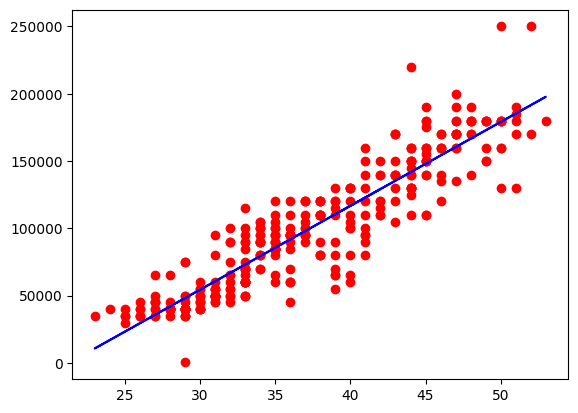

In [21]:
plt.scatter(X_train,Y_train,color = 'red')
plt.plot(X_train,model.predict(X_train),color = 'blue')
plt.show()

In [22]:
X_train

array([[39.],
       [43.],
       [36.],
       [31.],
       [40.],
       [44.],
       [36.],
       [48.],
       [41.],
       [25.],
       [44.],
       [49.],
       [31.],
       [42.],
       [48.],
       [31.],
       [30.],
       [37.],
       [39.],
       [34.],
       [29.],
       [44.],
       [49.],
       [38.],
       [26.],
       [31.],
       [40.],
       [45.],
       [32.],
       [31.],
       [39.],
       [30.],
       [48.],
       [42.],
       [39.],
       [49.],
       [25.],
       [33.],
       [34.],
       [24.],
       [29.],
       [28.],
       [46.],
       [48.],
       [52.],
       [32.],
       [28.],
       [44.],
       [43.],
       [43.],
       [40.],
       [49.],
       [48.],
       [45.],
       [35.],
       [48.],
       [35.],
       [35.],
       [42.],
       [44.],
       [29.],
       [41.],
       [44.],
       [47.],
       [33.],
       [34.],
       [30.],
       [43.],
       [44.],
       [31.],
       [30.],
      

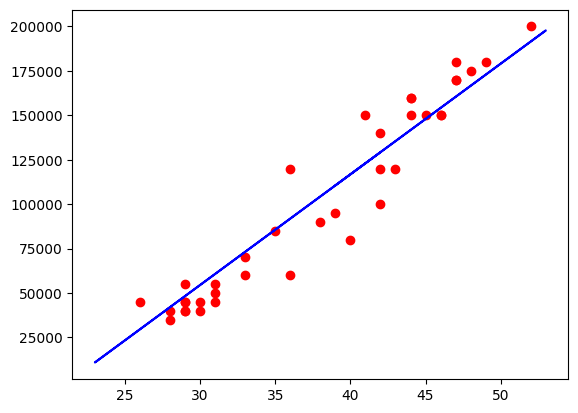

In [23]:
plt.scatter(X_test,Y_test,color = 'red')
plt.plot(X_train,model.predict(X_train),color = 'blue')
plt.show()

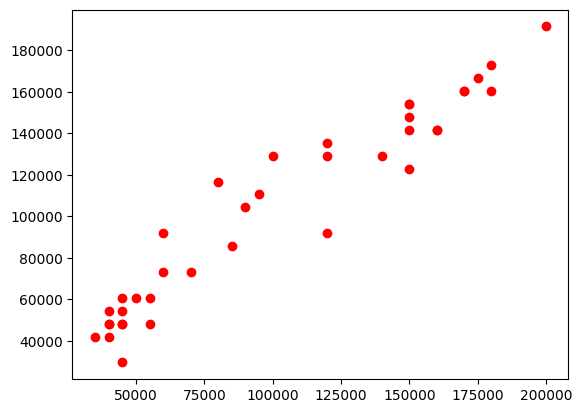

In [24]:
plt.scatter(Y_test,model.predict(X_test),color = 'red')


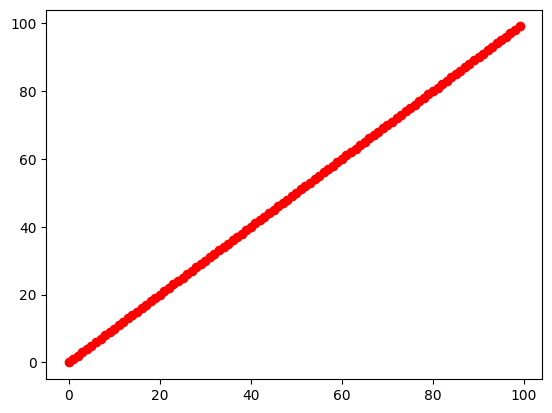

In [25]:
z = [i for i in range(100)]
plt.scatter(z,z,color = 'red')
